In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys
sys.path.append("..")

from src.data.preprocessing import load_preprocess_data, train_test_splitter, calculate_target, drop_normalized_cols
from src.features.feature_engineering import create_features

import pandas as pd
import numpy as np
import mlflow
# Setup MLFlow
EXPERIMENT_NAME = "guardians_of_the_memory_felix"
TRACKING_URI = open("../.mlflow_uri").read().strip()

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, recall_score, fbeta_score

RSEED = 42

In [2]:
df = pd.read_csv("../data/raw/failure.csv", parse_dates=["date"])
df.shape

(5936, 179)

In [3]:
lba_w = df.groupby("model").median().smart_241_raw
#lba_n = lba_w / df.groupby("model").mean().capacity_bytes
age = df.groupby("model").median().smart_9_raw / 24

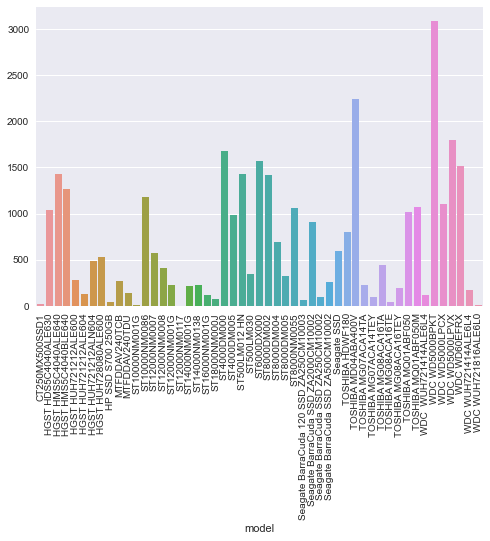

In [4]:
sns.barplot(x=age.index, y=age.values)
plt.xticks(rotation=90);

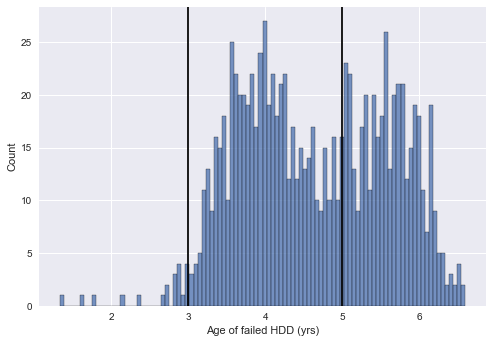

In [5]:
model_age = df[df.model == "ST4000DM000"].smart_9_raw / 24 / 365

sns.histplot(data=model_age, bins=100)
plt.axvline(x=3, c='k')
plt.axvline(x=5, c='k')
#plt.axvline(x=model_age.mean(), c='k')
#plt.axvline(x=model_age.median(), c='k')
plt.xlabel("Age of failed HDD (yrs)");
plt.savefig("../reports/figures/fail_age.png", bbox_inches='tight')#, transparent=True)

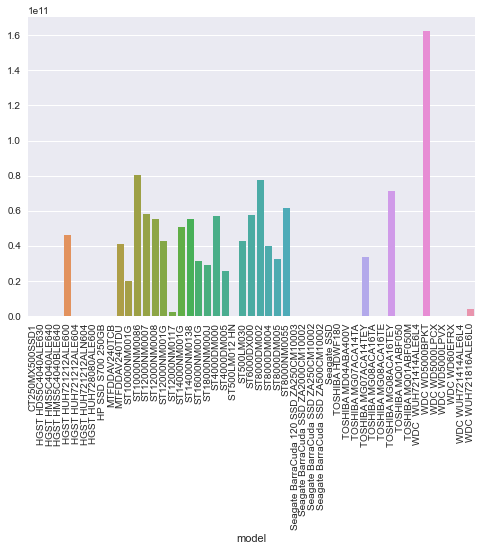

In [6]:
sns.barplot(x=lba_w.index, y=lba_w.values)
plt.xticks(rotation=90);